In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# Gideon vs Harrow plot characteristics analysis

## spoilers for both *Gideon the Ninth* and *Harrow the Ninth* ahead! 

As a right and proper nerd and fan of the Locked Tomb series by Tamsyn Muir, I am compelled to use my analytical data powers to further my fan-ness. 

Anyone who has read either book will note that there are skull illustrations at the beginning of each chapter, with each skull numbered with Roman numerals representing one of the Nine Houses. Taking into account these images, alongside other details of a particular chapter (perspective/voice, if the skull is broken or altered in any way), I wanted to see if I could compile some interesting things from these features alone. 

In [2]:
data = pd.read_csv('./chapter_header_data.csv')

## data description

* **Book**: indicates identifying portion of book title
* **Act**: which act of the book a given entry is in 
* **Chapter**: which chapter a given entry corresponds to. Note that this field is exclusively numeric for the sake of plotting and analysis; i.e., "epilogue" and other non-numeric chapter names are mapped onto a float value. Anything with a non-integer value corresponds to a chapter that actually has a text name instead of a number.
* **String chapter name**: The actual name of non-numeric chapters 
* **Skull image**: indicates number 1-9, where applicable, of a chapter header image 
* **Other image**: usually blank, this column indicates any non-crack alterations of a skull, or non-skull images. E.g., Herald. 
* **Broken**: Boolean flag for if a skull image is broken or not. Non-skull images are listed as No. 
* **Perspective**: 1,2,or 3, for first, second, or third person perspective, respectively. *Gideon* is told in third person, but *Harrow* is told in all three at various points.
* **Timing**: marks the chronology of a given chapter. *Gideon the Ninth* is a linear narrative, but *Harrow the Ninth* is far from it. There are two timelines in *Harrow*, one of which is an alternate timeline to the events in *Gideon*, and the other timeline follows the chronology of *Gideon*. 

In [3]:
data.head()

,Book,Act,Chapter,String chapter name,Skull image,Other image,Broken,Perspective,Timing
0,Gideon,1,1.0,NaN,9.0,NaN,No,3,Chronological
1,Gideon,1,2.0,NaN,9.0,NaN,No,3,Chronological
2,Gideon,1,3.0,NaN,1.0,NaN,No,3,Chronological
3,Gideon,1,4.0,NaN,9.0,NaN,No,3,Chronological
4,Gideon,1,5.0,NaN,9.0,NaN,No,3,Chronological


## *Gideon* vs *Harrow* comparisons

<Axes: xlabel='Perspective', ylabel='Chapter'>

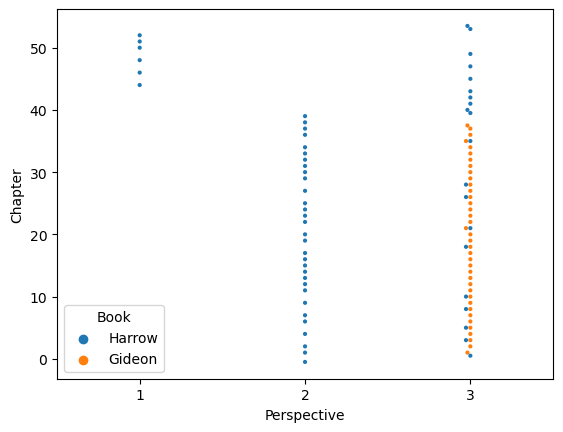

In [5]:
sns.swarmplot(data=data, y="Chapter", x="Perspective",size=3,hue='Book')

If you've read *Harrow*, you know why first person leaps out towards the end...although that person has been telling the story the entire time we've been in first or second person.

<Axes: xlabel='Perspective', ylabel='Chapter'>

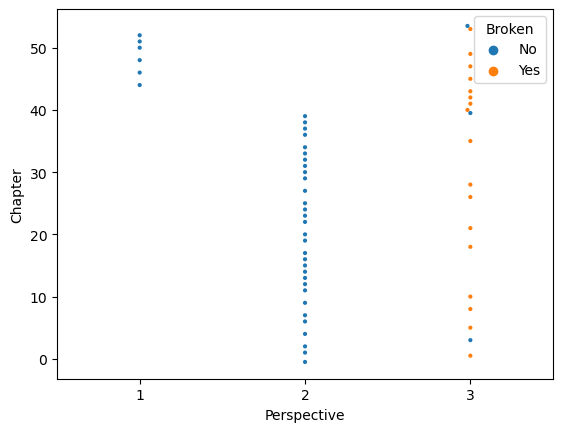

In [6]:
sns.swarmplot(data=data.loc[data.Book=='Harrow'], y="Chapter", x="Perspective",size=3,hue='Broken')

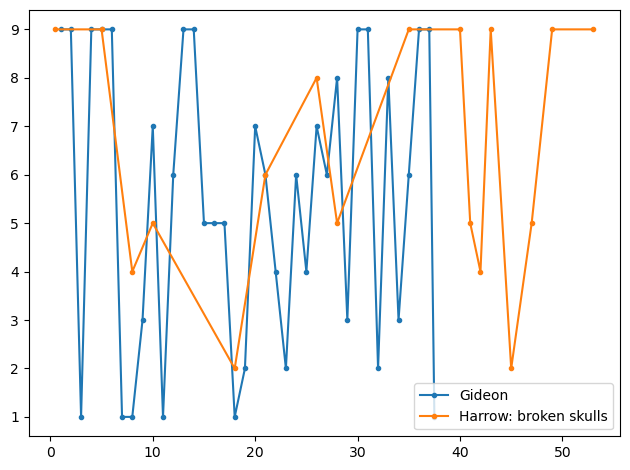

In [7]:
# does the order of the skulls in Gideon match the order of the skulls in the Broken=Yes chapters?

gideon = data.loc[data.Book=='Gideon']
harrow_broken = data.loc[(data.Book=='Harrow') & (data.Broken=='Yes')]

plt.plot(gideon.Chapter,gideon['Skull image'],marker='.',label='Gideon')
plt.plot(harrow_broken.Chapter,harrow_broken['Skull image'],marker='.',label='Harrow: broken skulls')
plt.legend()
plt.tight_layout()

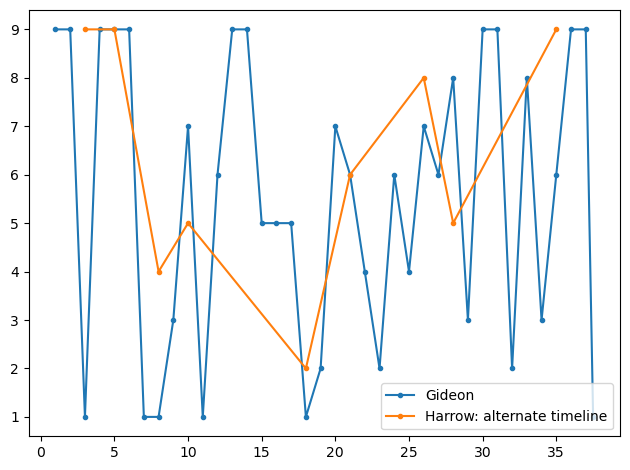

In [9]:
alternate_chronology = data.loc[(data.Book=='Harrow') & (data.Timing=='Alternate chronological')]


plt.plot(gideon.Chapter,gideon['Skull image'],marker='.',label="Gideon")
plt.plot(alternate_chronology.Chapter,alternate_chronology['Skull image'],label="Harrow: alternate timeline",marker='.')
plt.legend()
plt.tight_layout()

These results are really fascinating. Going into this analysis, my hypothesis was that the alternate history chapters would have skull chapter header numbers similar to those of *Gideon*. If you squint your eyes and squash the chapter axis for the *Gideon* vs *Harrow: broken skulls* plot, you'll see this is basically true! 

A more rigorous approach could be interesting here, where mathematically I alter the scaling of the *Harrow* data points and see if this holds true.

In [10]:
# TODO: is there a way to "squash" the Harrow broken skull data into the same range as Gideon data, 
# to see if after doing so it more strongly resembles Gideon data? 

## *Harrow* chronology: an accounting approach

With so much jumping around, I was curious to see exactly how much of *Harrow* takes place when. 

<Axes: xlabel='Chapter', ylabel='Timing'>

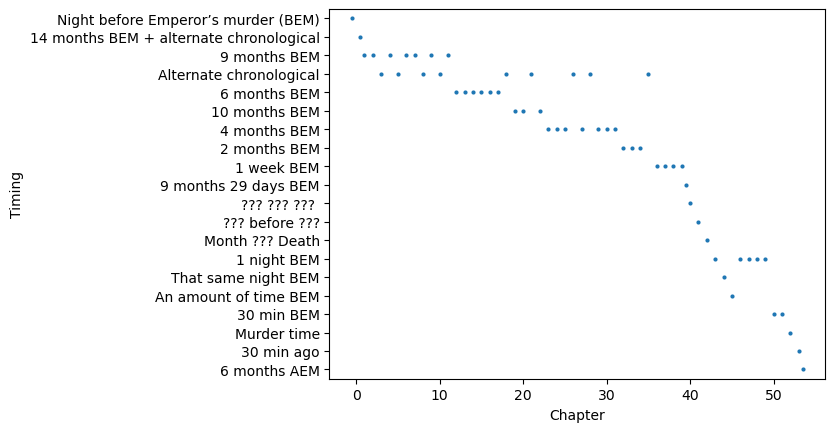

In [11]:
# in which time points does most of Harrow take place?
harrow = data.loc[(data.Book=='Harrow')]

sns.swarmplot(data=harrow, y="Timing", x="Chapter",size=3)

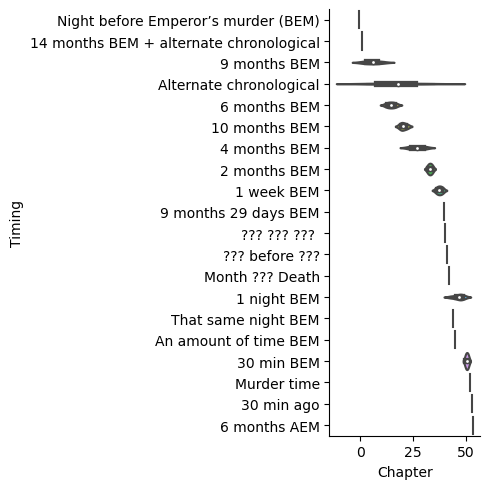

In [12]:
sns.catplot(data=harrow, y="Timing", x="Chapter",size=3,kind='violin')

The following plot describes how much of the book happens when, with the chronological points in actual chronological order!

A lot of the book happens in the alternate timeline, but the bulk of the book takes place some months before John's murder. In third place is the eve of his murder.

Text(0, 0.5, 'count')

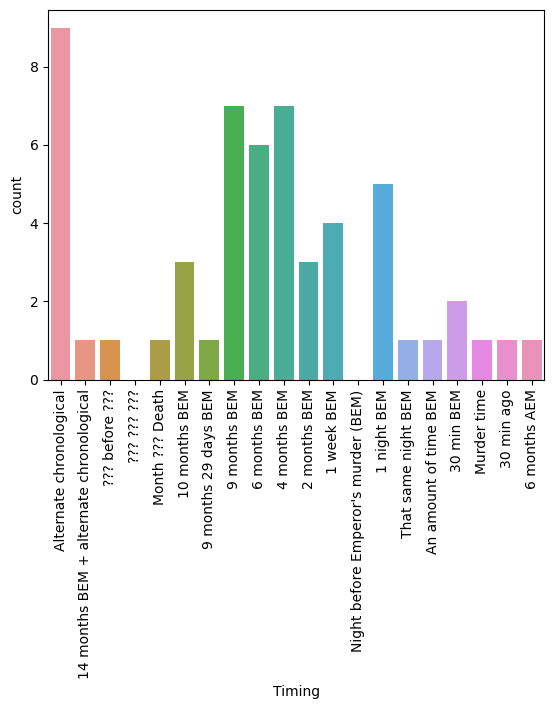

In [30]:
hue_order = ['Alternate chronological', '14 months BEM + alternate chronological','??? before ???', '??? ??? ???', 
            "Month ??? Death", '10 months BEM', '9 months 29 days BEM', '9 months BEM', '6 months BEM', '4 months BEM',
             '2 months BEM', '1 week BEM',"Night before Emperor's murder (BEM)", '1 night BEM', 'That same night BEM',
             'An amount of time BEM','30 min BEM', 'Murder time', '30 min ago', '6 months AEM'
            
            ]


harrow_plot = harrow.copy()
c_classes = pd.api.types.CategoricalDtype(ordered = True, categories = hue_order)
harrow_plot['Timing'] = harrow_plot['Timing'].astype(c_classes)
to_plot = harrow_plot.Timing.value_counts(sort=False)

ax = sns.barplot(data = harrow_plot, x = to_plot.index, y = to_plot.values)
plt.xticks(rotation=90);
plt.ylabel('count')

In [16]:
len(hue_order)

20

In [17]:
data.Timing.nunique()

21

In [26]:
harrow.Timing.value_counts()

Timing
Alternate chronological                    9
9 months BEM                               7
4 months BEM                               7
6 months BEM                               6
1 night BEM                                5
1 week BEM                                 4
10 months BEM                              3
2 months BEM                               3
30 min BEM                                 2
Night before Emperor’s murder (BEM)        1
That same night BEM                        1
30 min ago                                 1
Murder time                                1
An amount of time BEM                      1
??? ??? ???                                1
Month ??? Death                            1
??? before ???                             1
14 months BEM + alternate chronological    1
9 months 29 days BEM                       1
6 months AEM                               1
Name: count, dtype: int64

In [28]:
harrow_plot.Timing.value_counts() # TODO: why do two of the time entries not show up??? 

Timing
Alternate chronological                    9
9 months BEM                               7
4 months BEM                               7
6 months BEM                               6
1 night BEM                                5
1 week BEM                                 4
2 months BEM                               3
10 months BEM                              3
30 min BEM                                 2
9 months 29 days BEM                       1
Month ??? Death                            1
14 months BEM + alternate chronological    1
??? before ???                             1
That same night BEM                        1
An amount of time BEM                      1
Murder time                                1
30 min ago                                 1
6 months AEM                               1
??? ??? ???                                0
Night before Emperor's murder (BEM)        0
Name: count, dtype: int64

Hopefully I'll find more cool stuff to analyze here soon!